<h1>Exploratory Data Analysis on Camden Street Crime</h1>
This notebook provides a preliminary exploratory data analysis on the Camden street crime dataset.<br/>
The available dataset [upto Aug, 2019] from <a href='https://opendata.camden.gov.uk/Crime-and-Criminal-Justice/On-Street-Crime-In-Camden/qeje-7ve7'>here</a> was used plus addtional data retrieved through Police API [link <a href='https://police-api-client-python.readthedocs.io/en/latest/'>here</a>]. How the Police API is used and this additional data have been retrieved can be found in one of our notebook <a href='data_collection_camden_street_crime.ipynb'>here</a>. There are plenty of explanatory data analysis that can be conducted - we approached it in the following three ways in this notebook:<br/>
1. We will first perform an initial data analysis on all the street crimes over different years and the crime categories.<br/>
2. Then, we will perform street crimes' outcome analysis (e.g., average duration of days for each crime, proportion of resolved cases, etc.) on the dataset.<br/>
3. Finally, we inspect a specific crime (e.g., violence and sexual offences) across different Wards (neighbourhoods) within London Borough of Camden, and try to have an indication of whether this is more likely to occur in one particular Ward (neighbourhood) compared to the remaining ones using statistical techniques.

Some conclusions are discussed in the end of this notebook. A wide range of explanatory data analysis can be conducted on this rich dataset - we only have chosen a subset of them (preferably from a stakeholder angle that is social service/charity or local/central government).

In [1]:
# python libraries: pandas, numpy and datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

# font size manipulation for figures
#plt.rcParams.update({'font.size': 12})

In [2]:
# loading the Camden dataset retrieved from the link given: https://opendata.camden.gov.uk/Crime-and-Criminal-Justice/On-Street-Crime-In-Camden/qeje-7ve7
# The data is clipped to the London Borough of Camden boundary and created by using Police API [Crime] of this Borough
df = pd.read_csv('data/On_Street_Crime_In_Camden.csv')
print('Dataset shape: {}'.format(df.shape)) # rows and columns of the dataset
print('Different Ward Names ({}): {}'.format(len(df['Ward Name'].unique()),sorted(df['Ward Name'].unique()))) # different ward/neighbourhood names within London Borough of Camden
df.head(2)

Dataset shape: (210979, 20)
Different Ward Names (18): ['Belsize', 'Bloomsbury', 'Camden Town with Primrose Hill', 'Cantelowes', 'Fortune Green', 'Frognal and Fitzjohns', 'Gospel Oak', 'Hampstead Town', 'Haverstock', 'Highgate', 'Holborn and Covent Garden', 'Kentish Town', 'Kilburn', "King's Cross", "Regent's Park", 'St Pancras and Somers Town', 'Swiss Cottage', 'West Hampstead']


,Category,Street ID,Street Name,Context,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location
0,Other theft,1489515,Kings Cross (station),NaN,Status update unavailable,08/01/2017 12:00:00 AM,British Transport Police,Station,64777250,NaN,04/01/2017 12:00:00 AM,E05000143,St Pancras and Somers Town,530277.37,183101.39,-0.123189,51.531800,This is only an approximation of where the cri...,11/07/2018,"(51.5318, -0.123189)"
1,Anti-social behaviour,960522,On or near Wellesley Place,NaN,NaN,NaN,Police Force,NaN,51520755,NaN,09/01/2016 12:00:00 AM,E05000143,St Pancras and Somers Town,529707.23,182682.77,-0.131558,51.528169,This is only an approximation of where the cri...,11/07/2018,"(51.528169, -0.131558)"


In [3]:
# loading the latest street crime dataset of the same London Borough of Camden which was retrieved by using Police API
# which is downloaded beforehand and stored
df1 = pd.read_csv('data/Police_API_Dataset_Sep2019_Dec2020.csv')
print('Dataset shape: {}'.format(df1.shape)) # rows and columns of the dataset
print('Different Ward Names ({}): {}'.format(len(df1['Ward Name'].unique()),sorted(df1['Ward Name'].unique()))) # different ward/neighbourhood names within London Borough of Camden
df1.head(2)

Dataset shape: (58646, 20)
Different Ward Names (18): ['Belsize', 'Bloomsbury', 'Camden Town with Primrose Hill', 'Cantelowes', 'Fortune Green', 'Frognal and Fitzjohns', 'Gospel Oak', 'Hampstead Town', 'Haverstock', 'Highgate', 'Holborn and Covent Garden', 'Kentish Town', 'Kilburn', "King's Cross", "Regent's Park", 'St Pancras and Somers Town', 'Swiss Cottage', 'West Hampstead']


,Category,Street ID,Street Name,Context,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location
0,Anti-social behaviour,964975,On or near Neville Close,NaN,NaN,NaN,Police Force,NaN,77686630,NaN,09/01/2019 12:00:00 AM,E05000143,St Pancras and Somers Town,529926.228,183164.722,-0.128225,51.532450,This is only an approximation of where the cri...,19/02/2021,"(51.53245, -0.128225)"
1,Anti-social behaviour,960567,On or near Churchway,NaN,NaN,NaN,Police Force,NaN,77686723,NaN,09/01/2019 12:00:00 AM,E05000143,St Pancras and Somers Town,529778.237,182755.792,-0.130508,51.528809,This is only an approximation of where the cri...,19/02/2021,"(51.528809, -0.130508)"


In [4]:
# Some of the current Ward Code for identifying Wards by Police API have been changed as can be seen from Cell 8 of our data collection notebook.
# For consistency, we change the prevous years' dataset Ward Code
df = pd.concat([df, df1], sort=False)
# the Wards are: Swiss Cottage, Highgate, Camden Town with Primrose Hill and Regent's Park
ward_code_dict = {'E05000144':'00AG03N', 'E05000130':'00AG02N','E05000137':'E05000272','E05000142':'00BK15N'}
df.replace(ward_code_dict, inplace=True)
print('Dataset shape: {}'.format(df.shape)) # rows and columns of the dataset
print('Different Ward Names ({}): {}'.format(len(df['Ward Name'].unique()),sorted(df['Ward Name'].unique()))) # different ward/neighbourhood names within London Borough of Camden
df.head(2)

Dataset shape: (269625, 20)
Different Ward Names (18): ['Belsize', 'Bloomsbury', 'Camden Town with Primrose Hill', 'Cantelowes', 'Fortune Green', 'Frognal and Fitzjohns', 'Gospel Oak', 'Hampstead Town', 'Haverstock', 'Highgate', 'Holborn and Covent Garden', 'Kentish Town', 'Kilburn', "King's Cross", "Regent's Park", 'St Pancras and Somers Town', 'Swiss Cottage', 'West Hampstead']


,Category,Street ID,Street Name,Context,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location
0,Other theft,1489515,Kings Cross (station),NaN,Status update unavailable,08/01/2017 12:00:00 AM,British Transport Police,Station,64777250,NaN,04/01/2017 12:00:00 AM,E05000143,St Pancras and Somers Town,530277.37,183101.39,-0.123189,51.531800,This is only an approximation of where the cri...,11/07/2018,"(51.5318, -0.123189)"
1,Anti-social behaviour,960522,On or near Wellesley Place,NaN,NaN,NaN,Police Force,NaN,51520755,NaN,09/01/2016 12:00:00 AM,E05000143,St Pancras and Somers Town,529707.23,182682.77,-0.131558,51.528169,This is only an approximation of where the cri...,11/07/2018,"(51.528169, -0.131558)"


In [5]:
# By going through Police API, and later checking the retrieved data, it is revealed that the 'Epoch' field of the Camden dataset is the reporting date of the crime
# Creating a time series dataset using Epoch as the index
df['Epoch'] = df['Epoch'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
df= df.set_index(['Epoch'])
print('Dataset start date: {}, and end date: {}'.format(str(df.index.min()).split(' ')[0],str(df.index.max()).split(' ')[0]))
d1 = dict(zip(list(df.columns), list(df.dtypes))) # datatypes indexed by column name
d2 = dict(zip(list(df.columns), list(df.isnull().sum()))) # number of null values indexed by column names
temp_df = pd.DataFrame([d1, d2], index=['data type', 'null values']) # creating a pandas dataframe: just for visualisation
temp_df

Dataset start date: 2015-01-01, and end date: 2020-12-01


,Category,Street ID,Street Name,Context,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location
data type,object,int64,object,float64,object,object,object,object,int64,object,object,object,float64,float64,float64,float64,object,object,object
null values,0,0,0,269625,64856,64856,0,255084,0,75934,0,0,0,0,0,0,0,0,0


<h3>Dataset Information</h3>
At this point, we have a time-series dataset between Jan, 2015 and Dec, 2020.<br/>
In the following we will perform an initial analysis on the street crimes over different years and category of crimes.<br/>
<h3>Different Street Crime Categories between 2015 and 2020</h3>

In [6]:
temp_df = pd.DataFrame(df.resample('M').size())
print('Number of different street crime categories: ',len(df['Category'].unique()))
print('The specific month (and year) with the most street crimes: {} ({})'.format(str(temp_df.idxmax()[0]).split(' ')[0], str(df.resample('Y').size().idxmax()).split(' ')[0].split('-')[0]))
print('The specific month (and year) with the least street crimes: {} ({})'.format(str(temp_df.idxmin()[0]).split(' ')[0], str(df.resample('Y').size().idxmin()).split(' ')[0].split('-')[0]))

month_lst = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

temp_df = pd.DataFrame([dict(zip(month_lst, list(temp_df['2015-01-01' :'2015-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2016-01-01' :'2016-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2017-01-01' :'2017-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2018-01-01' :'2018-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2019-01-01' :'2019-12-31'][0]))), \
                              dict(zip(month_lst, list(temp_df['2020-01-01' :'2020-12-31'][0])))], \
                  index = ['2015', '2016', '2017', '2018', '2019', '2020'])
temp_df['Total'] = temp_df.sum(axis=1)
print('\nTable of total street comes over various months/years of London Borough of Camden\n********************************************************************')
temp_df.head(6)

Number of different street crime categories:  14
The specific month (and year) with the most street crimes: 2019-03-31 (2019)
The specific month (and year) with the least street crimes: 2020-12-31 (2016)

Table of total street comes over various months/years of London Borough of Camden
********************************************************************


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
2015,3111,3028,3412,3399,3602,3621,3576,3305,3304,3730,3574,3341,41003
2016,3244,3030,3004,3237,3559,3383,3800,3740,3508,3397,3319,3420,40641
2017,3073,3190,3728,3874,4185,4126,4356,4249,4027,4380,4009,3524,46721
2018,3802,3422,3942,3906,4044,4075,4266,3966,3884,4336,4412,4057,48112
2019,4114,4114,4694,4327,4362,4352,4438,4101,3691,4406,4014,3908,50521
2020,4136,4162,3587,3176,3498,3281,3610,3732,3513,3729,3314,2889,42627


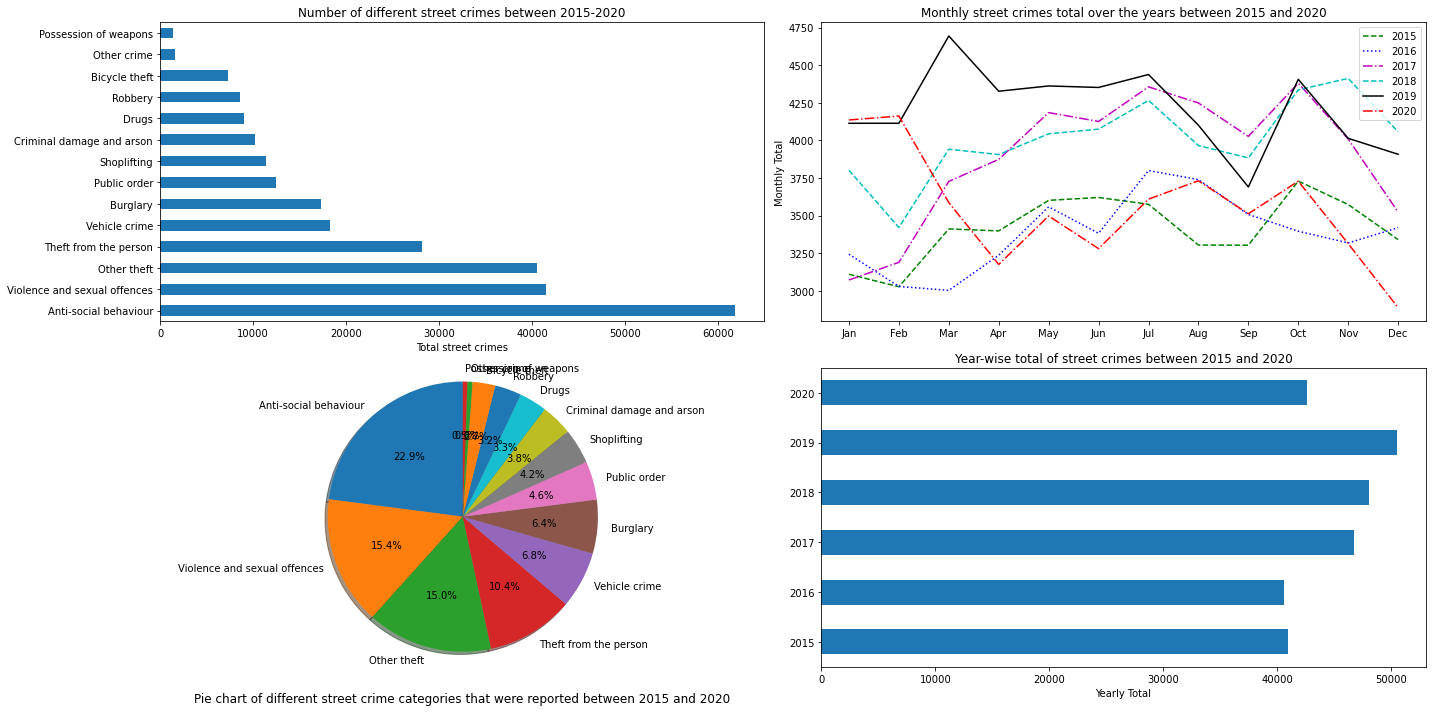

In [7]:
labels = ['2015', '2016', '2017', '2018', '2019', '2020'] # dataset span across six years
line_style = ['--g', ':b', '-.m', '--c', '-k', '-.r'] # these are just line styles for the graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # 2 rows, 2 columns for the 4 drawn graphs below
# the graph showing the total number of street crimes across different categories
df['Category'].value_counts().plot(kind='barh', ax=axes[0][0], title='Number of different street crimes between 2015-2020')
# the graph showing the monthly total crimes for different years
for i in range(len(labels)):
    axes[0][1].plot(month_lst, list(temp_df.drop(['Total'], axis=1).loc[labels[i]]), line_style[i], label=labels[i])   

# total yearly street crimes between 2015 and 2020
temp_df['Total'].plot(kind='barh', ax=axes[1][1], title='Year-wise total of street crimes between 2015 and 2020')


axes[1][0].pie(list(df['Category'].value_counts()), labels=list(df['Category'].value_counts().index), autopct='%1.1f%%', shadow=True, startangle=90)
axes[1][0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# setting titles, x and y labels
axes[0][1].set_title('Monthly street crimes total over the years between 2015 and 2020')
axes[0][1].set_ylabel('Monthly Total')
axes[0][1].legend(loc='best')
axes[0][0].set_xlabel('Total street crimes')
axes[1][1].set_xlabel('Yearly Total')
axes[1][0].set_title('Pie chart of different street crime categories that were reported between 2015 and 2020', y=0, pad=-25, verticalalignment="top")

fig.subplots_adjust(wspace=0.15)
plt.tight_layout()
plt.show()
#fig.savefig('bar.png', dpi=fig.dpi)

<h3>Street Crime Outcome Analysis</h3>
In this part, we inspect the potential outcomes for each reported street crime, number of days to reach the outcome, and the proportion of resolved/unresolved cases.

In [8]:
# from the Police API, we know that the Anti-social behaviour will always have no Outcome record
# We try to check if there are some other crimes where the Outcome is also not null
print('Number of street crimes where the Outcome Category is null: {}, Number of Anti-social Behaviour crimes: {}'.format(df['Outcome Category'].isnull().sum(),df[df['Category']=='Anti-social behaviour'].count()[0]))
print('Number of null Outcomes when the crime is NOT Anti-social Behaviour: {}'.format(df[(df['Category']!='Anti-social behaviour')]['Outcome Category'].isnull().sum()))
print('Number of non-null Outcomes when the crime is Anti-social Behaviour: {}'.format(df[(df['Category']=='Anti-social behaviour')]['Outcome Category'].notnull().sum()))

Number of street crimes where the Outcome Category is null: 64856, Number of Anti-social Behaviour crimes: 61863
Number of null Outcomes when the crime is NOT Anti-social Behaviour: 2993
Number of non-null Outcomes when the crime is Anti-social Behaviour: 0


In [9]:
# we will remove all the Anti-social Behaviour crime category records first
df1 = df[df['Category'] != 'Anti-social behaviour'].copy()
 # replace the remaining NaNs with a string 'No outcome information' - this group seemed to be covered by British Transport Police
df1['Outcome Category'] = df1['Outcome Category'].fillna('No outcome information')

In [10]:
print('The computation in this part does not consider Anti-social behaviour (Police API makes it very clear they are not considered for Outcomes)')
print('{} outcomes with NaNs  - we remove these records from outcome analysis too'.format(df1[(df1['Outcome Category']=='No outcome information') & (df1['Service']=='British Transport Police')].count()[0]))
#df1 = df1[df1['Outcome Category'] != 'No outcome information']
d1 = dict(zip(list(df1['Outcome Category'].value_counts().index), list(df1['Outcome Category'].value_counts()))) # total number of crimes
d2 = dict(zip(list(df1['Outcome Category'].value_counts().index), list(df1['Outcome Category'].value_counts(normalize=True)*100))) # percentages
temp_df = pd.DataFrame([d1, d2], index=['Number of crimes', 'Percentage']) # creating a pandas dataframe: just for visualisation
#print('Proportion of unresolved (or ongoing) crime incidents: {:.2f}%\nWe considered {}, {}, and {} as the categories attributing to unresolved cases.'.format(d2['Under investigation']+d2['Status update unavailable']+d2['Court result unavailable'], temp_df.columns[0], temp_df.columns[2], temp_df.columns[3]))
#print('Furthermore, there were {:.2f}% cases where no suspect could be identified'.format(d2['Investigation complete; no suspect identified']))
temp_df

The computation in this part does not consider Anti-social behaviour (Police API makes it very clear they are not considered for Outcomes)
2993 outcomes with NaNs  - we remove these records from outcome analysis too


,Under investigation,Investigation complete; no suspect identified,Status update unavailable,Awaiting court outcome,No outcome information,Local resolution,Offender given a caution,Offender given a drugs possession warning,Court result unavailable,Offender given penalty notice,...,Offender otherwise dealt with,Offender ordered to pay compensation,Unable to prosecute suspect,Offender deprived of property,Defendant sent to Crown Court,Suspect charged as part of another case,Offender given absolute discharge,Further investigation is not in the public interest,Action to be taken by another organisation,Formal action is not in the public interest
Number of crimes,82303.000000,68554.000000,36110.000000,4525.000000,2993.000000,2807.000000,2155.000000,2152.000000,1917.00000,975.000000,...,57.000000,56.000000,47.000000,32.000000,26.000000,13.000000,8.000000,6.000000,2.000000,1.000000
Percentage,39.614078,32.996409,17.380464,2.177973,1.440591,1.351065,1.037245,1.035801,0.92269,0.469287,...,0.027435,0.026954,0.022622,0.015402,0.012514,0.006257,0.003851,0.002888,0.000963,0.000481


In [11]:
# separating outcomes that are unavailable, pending from the specific outcomes: this part is needed to draw the pie chart below
# showing the proportion of different outcomes of the street crimes: many were unresolved/on-going?
outcome_lst = [temp_df.loc['Number of crimes', temp_df.columns[0]], temp_df.loc['Number of crimes', temp_df.columns[1]], temp_df.loc['Number of crimes', temp_df.columns[2]],temp_df.loc['Number of crimes', temp_df.columns[3]],temp_df.loc['Number of crimes', temp_df.columns[8]]]
outcome_labels = [temp_df.columns[0], temp_df.columns[1], temp_df.columns[2],temp_df.columns[3],temp_df.columns[8]]
outcome_lst.append(temp_df.loc['Number of crimes'].sum()-sum(outcome_lst))
outcome_labels.append('Other specific outcomes')

In [12]:
# only considering the cases that are under investigation or awaiting court decision
year_lst = list((df1['Outcome Category'].resample('Y').count().index.strftime('%Y-%m-%d')))
year_lst = [x.split('-')[0] for x in year_lst] # a list only having the year as a string
outcome_under_investigation = list(df1[(df1['Outcome Category'] == temp_df.columns[0])]['Outcome Category'].resample('Y').count()) # outcome category that is under investigation
outcome_awaiting_court = list(df1[(df1['Outcome Category'] == temp_df.columns[3])]['Outcome Category'].resample('Y').count()) # outcome category that is awaiting court decision

In [13]:
# In this part, we are computing the average number of days for reaching the street crime outcomes
# first, converting Outcome Date to datetime type
df1 = df1[df1['Outcome Category'] != 'No outcome information'] # discarding the NaN Outcomes as well
df1['Outcome Date'] = df1['Outcome Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
# creating a new column which will hold the difference of days between Outcome Date and Epoch [Reporting Date]
df1['Outcome Computation Days'] = df1['Outcome Date'] - df1.index

# converting this difference into integer
df1['Outcome Computation Days'] = df1['Outcome Computation Days'].astype(str)
df1['Outcome Computation Days'] = df1['Outcome Computation Days'].apply(lambda x: (int(x.split(' ')[0])))

# this will store the average days for reaching Outcome for each street crime type 
grouped = df1.groupby('Category', as_index=False)['Outcome Computation Days'].mean()

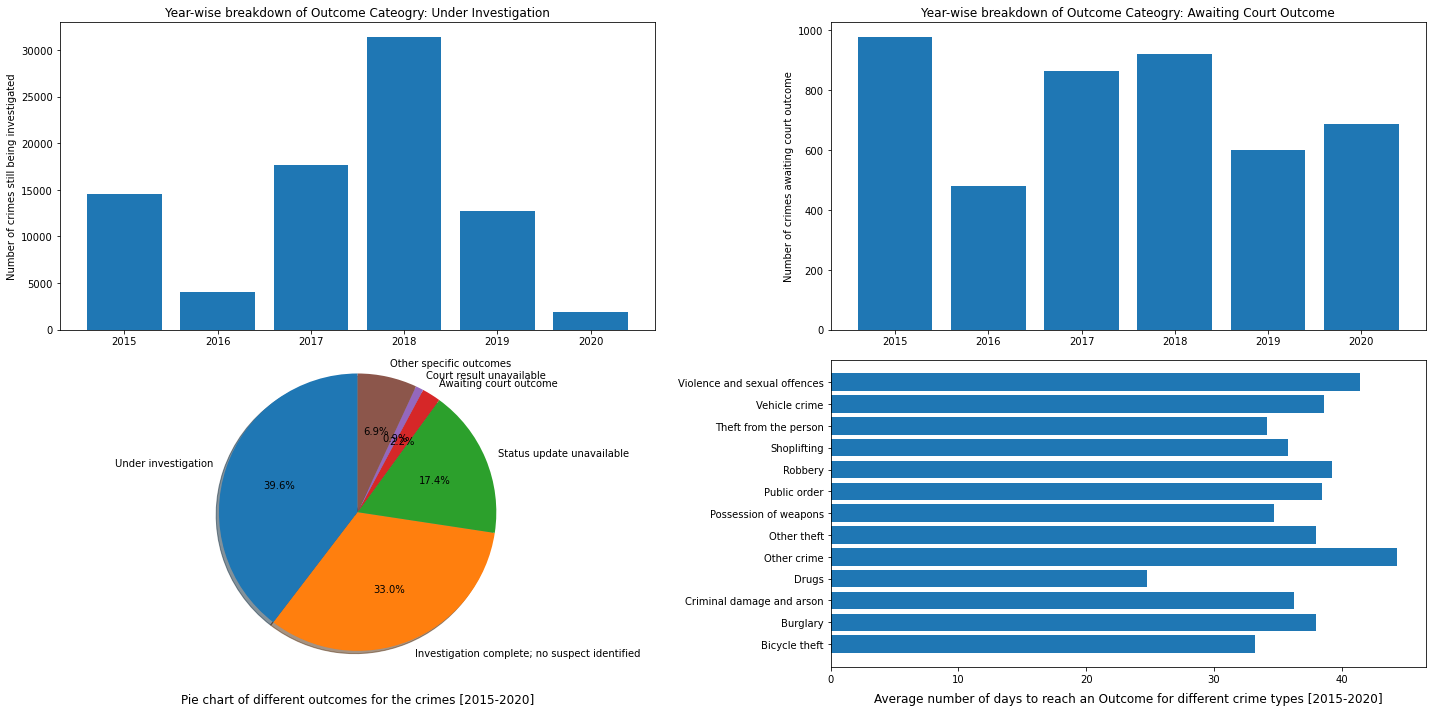

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # 2 rows, 2 columns for the 4 drawn graphs

# showing the year-wise breakdown of a specific Outcome Category: Under Investigation
# just to have an idea how long does an Outcome to be reached for a crime
axes[0][0].bar(year_lst, outcome_under_investigation)

# showing the year-wise breakdown of a specific Outcome Category: Awaiting Court Outcome
# just to have an idea if crimes take a long time to get a outcome
axes[0][1].bar(year_lst, outcome_awaiting_court)

# pie chart to show the percentages of different outcomes for the reported crimes
axes[1][0].pie(outcome_lst, labels=outcome_labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1][0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# this graph shows the average days for reaching an Outcome for different crime types 
axes[1][1].barh(grouped['Category'], grouped['Outcome Computation Days'])

# setting titles, x and y labels
axes[0][0].set_title('Year-wise breakdown of Outcome Cateogry: Under Investigation')
axes[0][0].set_ylabel('Number of crimes still being investigated')
axes[0][1].set_title('Year-wise breakdown of Outcome Cateogry: Awaiting Court Outcome')
axes[0][1].set_ylabel('Number of crimes awaiting court outcome')
axes[1][0].set_title('Pie chart of different outcomes for the crimes [2015-2020]', y=0, pad=-25, verticalalignment="top")
axes[1][1].set_title('Average number of days to reach an Outcome for different crime types [2015-2020]', y=0, pad=-25, verticalalignment="top")

fig.subplots_adjust(wspace=0.15)
plt.tight_layout()
plt.show()
#fig.savefig('bar2.png', dpi=fig.dpi)

<h3>Analysis of a Specific Street Crime - Violence and Sexual Offences</h3>
In this part, we inspect a specific crime (e.g., violence and sexual offences) across different Wards (neighbourhoods) within London Borough of Camden, and try to have an indication of whether this is more likely to occur in one particular Ward (neighbourhood) compared to the remaining ones.

In [15]:
df1 = df[df['Category']=='Violence and sexual offences']
print('Total number of such crime (Violence and sexual offences) incidents inside the dataset: {}'.format(df1.shape[0]))

Total number of such crime (Violence and sexual offences) incidents inside the dataset: 41515


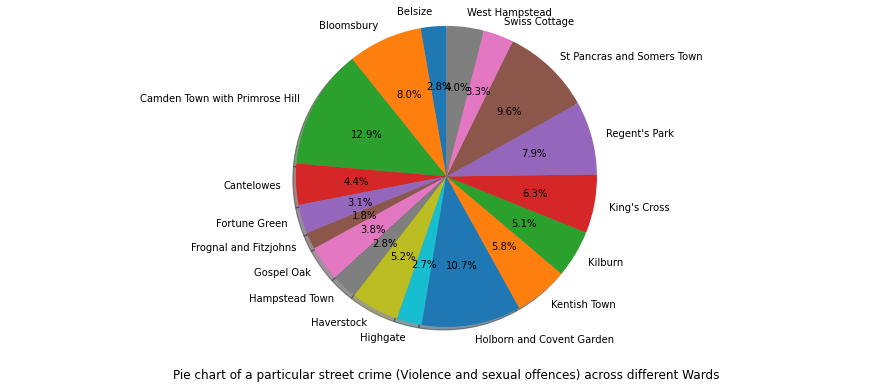

In [16]:
# we will try to check the Ward-wise distribution  of such crime in London Borough of Camden
grouped = df1.groupby('Ward Name', as_index=False)['Category'].agg(len)
fig, ax = plt.subplots(figsize=(12.5, 5.5))

# pie chart to show the percentages of such crime across different Wards (Neighbourhoods)
ax.pie(grouped['Category'], labels=grouped['Ward Name'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('Pie chart of a particular street crime (Violence and sexual offences) across different Camden Borough Wards (Neighbourhoods) [2015-2020]', y=0, pad=-25, verticalalignment="top")
ax.set_title('Pie chart of a particular street crime (Violence and sexual offences) across different Wards', y=0, pad=-25, verticalalignment="top")
plt.tight_layout()
plt.show()
#fig.savefig('pie.png', dpi=fig.dpi)

<h4>Hypothesis Testing</h4>
In this part, we will check one hypothesis:
whether <em>St. Pancras and Somers Town's</em> Violence and sexual offences crime rate is higher than the remaining neighbourhoods on average.<br/>
<em>Null hypothesis</em>: St. Pancras and Somers Town's average Violence and sexual offences crime rate and the remaining neighbourhoods' average rate are the same or St. Pancras and Somer Town's one is lower.<br/>
<em>Althernative hypothesis<em>: St. Pancras and Somers Town's average is higher.

In [17]:
st_pancras = list(df1[df1['Ward Name']=='St Pancras and Somers Town'].resample('M').count()['Category']) # monthly average in the St. Pancras Ward
not_st_pancras = list(df1[df1['Ward Name']!='St Pancras and Somers Town'].resample('M').count()['Category']) 
#st_pancras = list(df1[df1['Ward Name']=="Kilburn"].resample('M').count()['Category']) # monthly average in the St. Pancras Ward
#not_st_pancras = list(df1[df1['Ward Name']!="Kilburn"].resample('M').count()['Category']) 
not_st_pancras = [x/(len(df1['Ward Name'].unique())-1) for x in not_st_pancras] # average of the remaining Wards

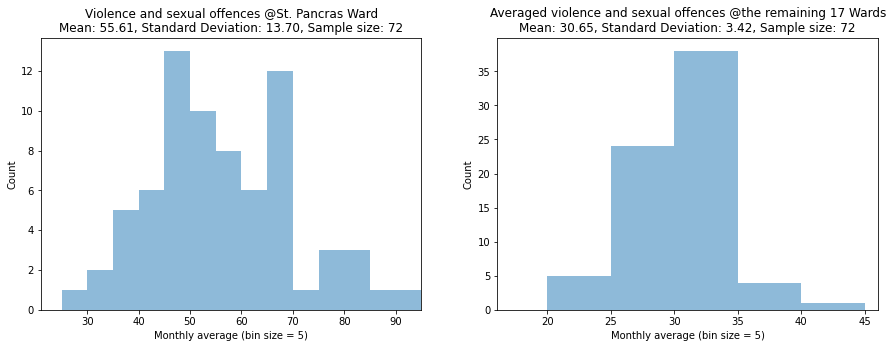

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # 2 rows, 2 columns for the 4 drawn graphs

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

# drawing two histograms: one for average monthly crime cases for violence and sexual offences in St. Pancras and Somers Town
# the other histgram will be for the same crime - averaged for the remaining wards/neighbourhoods other than St. Pancras and Somers Town
axes[0].set_xlim([min(st_pancras)-5, max(st_pancras)+5])
axes[0].hist(st_pancras, bins=bins, alpha=0.5)
axes[0].set_title('Violence and sexual offences @St. Pancras Ward\nMean: {:.2f}, Standard Deviation: {:.2f}, Sample size: {}'.format(np.mean(st_pancras), np.std(st_pancras), len(st_pancras)))
axes[0].set_xlabel('Monthly average (bin size = 5)')
axes[0].set_ylabel('Count')

axes[1].set_xlim([min(not_st_pancras)-5, max(not_st_pancras)+5])
axes[1].hist(not_st_pancras, bins=bins, alpha=0.5)
#axes[1].set_title('Averaged violence and sexual offences @the remaining {} Wards\nMean: {:.2f}, Standard Deviation: {:.2f}, Sample size: {}'.format(len(df1['Ward Name'].unique())-1,np.mean(not_st_pancras), np.std(not_st_pancras), len(not_st_pancras)*(len(df1['Ward Name'].unique())-1)))
axes[1].set_title('Averaged violence and sexual offences @the remaining {} Wards\nMean: {:.2f}, Standard Deviation: {:.2f}, Sample size: {}'.format(len(df1['Ward Name'].unique())-1,np.mean(not_st_pancras), np.std(not_st_pancras), len(not_st_pancras)))
axes[1].set_xlabel('Monthly average (bin size = 5)')
axes[1].set_ylabel('Count')

plt.show()
#fig.savefig('hypothesis.png', dpi=fig.dpi)

In [19]:
# We perform two-sample Z-test. Compute z = (sample mean 1 - sample mean 2) - 0 / (SE) for difference
se_diff = np.sqrt((np.var(st_pancras)/len(st_pancras))+(np.var(not_st_pancras)/(len(not_st_pancras))))
#se_diff = np.sqrt((np.var(st_pancras)/len(st_pancras))+(np.var(not_st_pancras)/((len(df1['Ward Name'].unique())-1)*len(not_st_pancras))))
z = (np.mean(st_pancras) - np.mean(not_st_pancras))/se_diff
# The computed z-score is higher than 2.576 [1% significance level], we may reject the null hypothesis
print('The computed Z-score: {:.5f}'.format(z))

The computed Z-score: 14.99679


We reject the null hypothesis. This shows St. Pancras and Somer Town's Violence and sexual offences crime rate is significantly higher than the average of the remaining Wards. In the next notebook, we investigate whether this crime rate in this Ward can be predicted using a time-series dataset <a href='modelling_and_inference_camden_street_crime.ipynb'>here</a>.

<h1>Conclusion</h1>
1. We performed initial data analysis showing the crime rate trend for the last six years, and also the proportion of different streets crimes that are reported during this period. We utilised additional recent data retrieved from the Police API [the related notebook is <a href='data_collection_camden_street_crime.ipynb'>here</a>] that were missing inside the Camden dataset.<br/>
2. Subsequently, we inspected the number of unresolved/resolved/on-going crime cases together with the average duration analysis [e.g., average number of days] that takes to reach an outcome for different types of crimes.<br/>
3. Finally, we considered a specific street crime, and showed one example of how different statistical analyses can be performed to inform useful decisions for stakeholders.<br/>
4. Based on the stakeholder type and requirement, plenty of analysis can also be performed on this rich dataset, e.g., if given time, various location specific analysis can be performed for operational aspects of Police [detecting hotspot to deploy force (uniform/plain), and technology like CCTV, etc.].<br/>
5. We also found that the Camden stored dataset [CSV] may be a bit outdated (especially regarding the Outcome Category/Date). There were a few other details (e.g., Ward Code) that are different in the Police API now. Given time, the whole dataset could be created by using the Police API which is updated more regularly. Consequently, more accurate analysis of the dataset could be achieved.